<a href="https://colab.research.google.com/github/srimayamohapatra/Cyclone-in-Odisha-India-/blob/main/dharali_landslide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Access your folder
# Replace 'path_to_your_folder' with the actual path in your Drive.
# Since the folder name is "Dharali", it is likely located at:
folder_path = '/content/drive/MyDrive/Dharali'

# 3. Check if the folder exists and list files
if os.path.exists(folder_path):
    print(f"Contents of {folder_path}:")
    print(os.listdir(folder_path))
else:
    print(f"Folder not found at {folder_path}. Please check the path in the Files tab.")

Mounted at /content/drive
Contents of /content/drive/MyDrive/Dharali:
['DEM_for_HECRAS.tif', 'Post_Event_Image_for_HECRAS.tif', '1_Visual_Before_TrueColor.tif', '1_Visual_Before_FalseColor.tif', '1_Visual_After_TrueColor.tif', '1_Visual_After_FalseColor.tif', '2_NDVI_Before.tif', '2_Mask_Landslide.tif', '3_NDWI_Before.tif', '2_NDVI_After.tif', '4_NDSI_After.tif', '5_Terrain_Slope.tif', '4_NDSI_Diff.tif', '4_NDSI_Before.tif', '4_Mask_Snow.tif', '2_NDVI_Diff.tif', '3_NDWI_Diff.tif', '3_NDWI_After.tif', '5_Reference_Raster_Asset.tif']


In [2]:
!pip install rasterio matplotlib

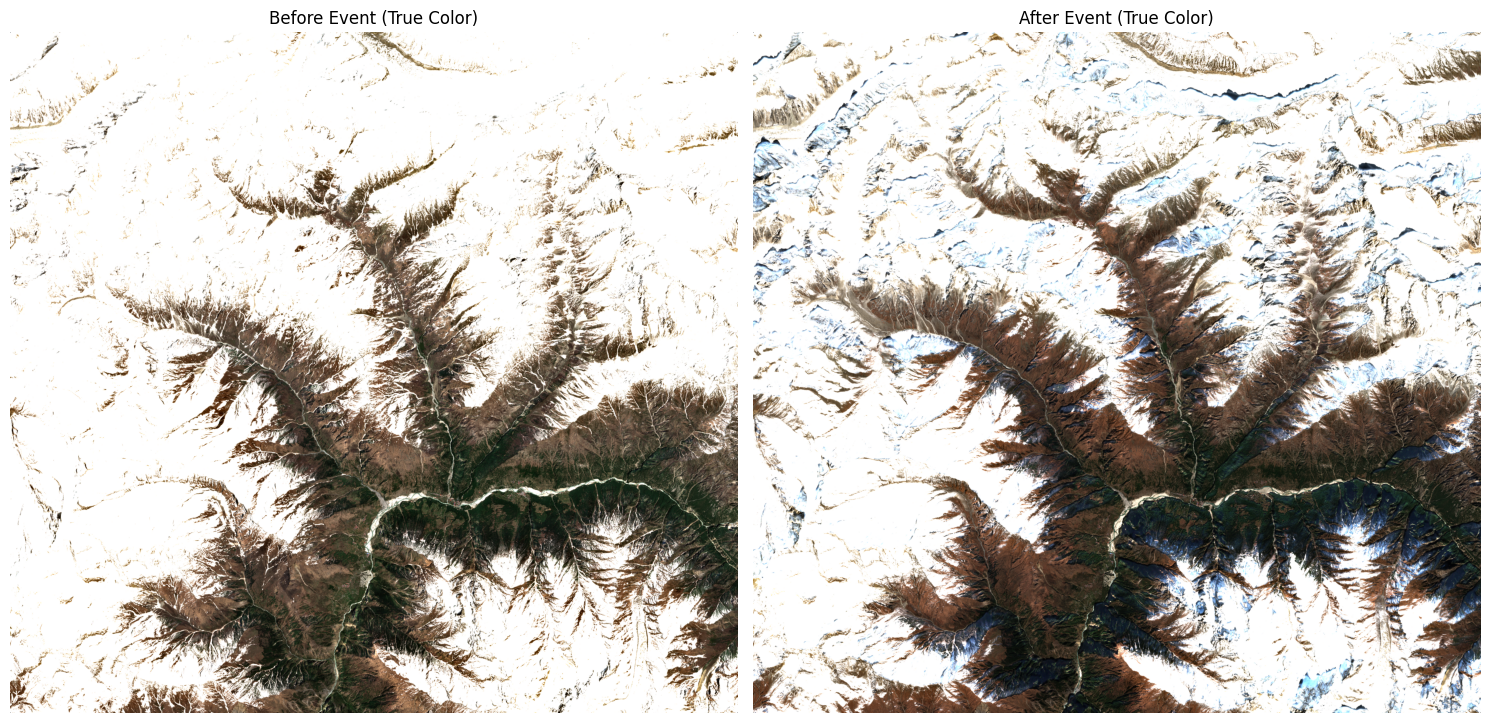

In [3]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import os

# Define file paths
base_path = '/content/drive/MyDrive/Dharali'
before_path = os.path.join(base_path, '1_Visual_Before_TrueColor.tif')
after_path = os.path.join(base_path, '1_Visual_After_TrueColor.tif')

def read_and_prep_image(path):
    """Reads a raster and rearranges dimensions for plotting (Channels, H, W) -> (H, W, Channels)"""
    if not os.path.exists(path):
        print(f"File not found: {path}")
        return None

    with rasterio.open(path) as src:
        # Read the first 3 bands (Red, Green, Blue)
        img = src.read([1, 2, 3])

        # Transpose from (Band, Row, Col) to (Row, Col, Band) for matplotlib
        img = np.moveaxis(img, 0, -1)

        # Normalize to 0-1 range for display if data is not already uint8
        if img.dtype != 'uint8':
            # Simple min-max normalization to brighten the image
            img = img.astype(float)
            img = (img - np.nanmin(img)) / (np.nanmax(img) - np.nanmin(img))

        return img

# Load images
img_before = read_and_prep_image(before_path)
img_after = read_and_prep_image(after_path)

# Plotting
plt.figure(figsize=(15, 8))

# Before Event
plt.subplot(1, 2, 1)
if img_before is not None:
    plt.imshow(img_before)
    plt.title("Before Event (True Color)")
    plt.axis('off')

# After Event
plt.subplot(1, 2, 2)
if img_after is not None:
    plt.imshow(img_after)
    plt.title("After Event (True Color)")
    plt.axis('off')

plt.tight_layout()
plt.show()

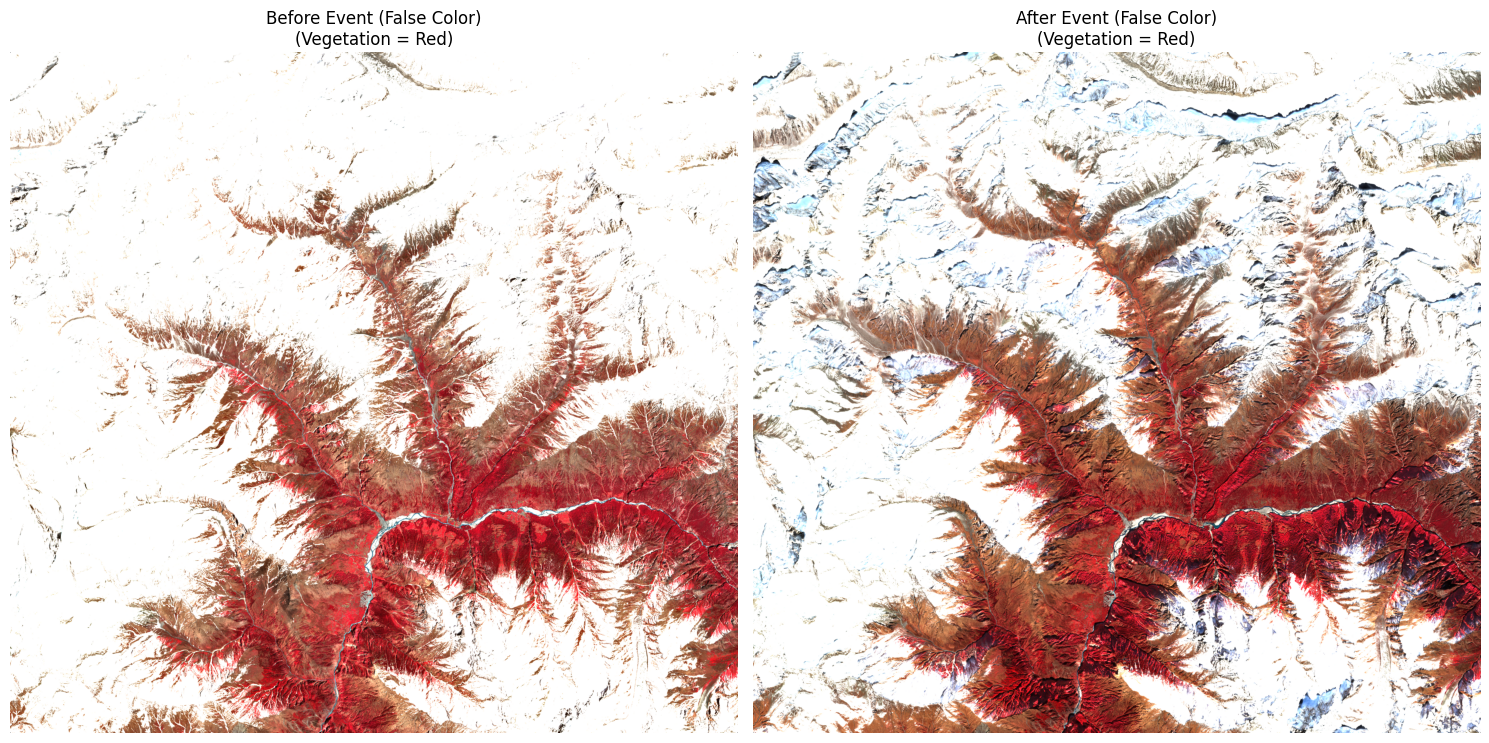

In [4]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import os

# Define file paths for False Color images
base_path = '/content/drive/MyDrive/Dharali'
fcc_before_path = os.path.join(base_path, '1_Visual_Before_FalseColor.tif')
fcc_after_path = os.path.join(base_path, '1_Visual_After_FalseColor.tif')

def read_and_prep_image(path):
    """Reads a raster and rearranges dimensions for plotting"""
    if not os.path.exists(path):
        print(f"File not found: {path}")
        return None

    with rasterio.open(path) as src:
        # Read the first 3 bands (Standard FCC uses NIR, Red, Green mapped to R, G, B)
        # Your Tiff likely already has these bands pre-arranged if it's named "FalseColor"
        img = src.read([1, 2, 3])

        # Transpose from (Band, Row, Col) to (Row, Col, Band)
        img = np.moveaxis(img, 0, -1)

        # Normalize to 0-1 range for display
        img = img.astype(float)
        # Avoid division by zero if image is empty
        if np.nanmax(img) > np.nanmin(img):
            img = (img - np.nanmin(img)) / (np.nanmax(img) - np.nanmin(img))

        return img

# Load FCC images
fcc_before = read_and_prep_image(fcc_before_path)
fcc_after = read_and_prep_image(fcc_after_path)

# Plotting
plt.figure(figsize=(15, 8))

# Before Event (FCC)
plt.subplot(1, 2, 1)
if fcc_before is not None:
    plt.imshow(fcc_before)
    plt.title("Before Event (False Color)\n(Vegetation = Red)")
    plt.axis('off')

# After Event (FCC)
plt.subplot(1, 2, 2)
if fcc_after is not None:
    plt.imshow(fcc_after)
    plt.title("After Event (False Color)\n(Vegetation = Red)")
    plt.axis('off')

plt.tight_layout()
plt.show()

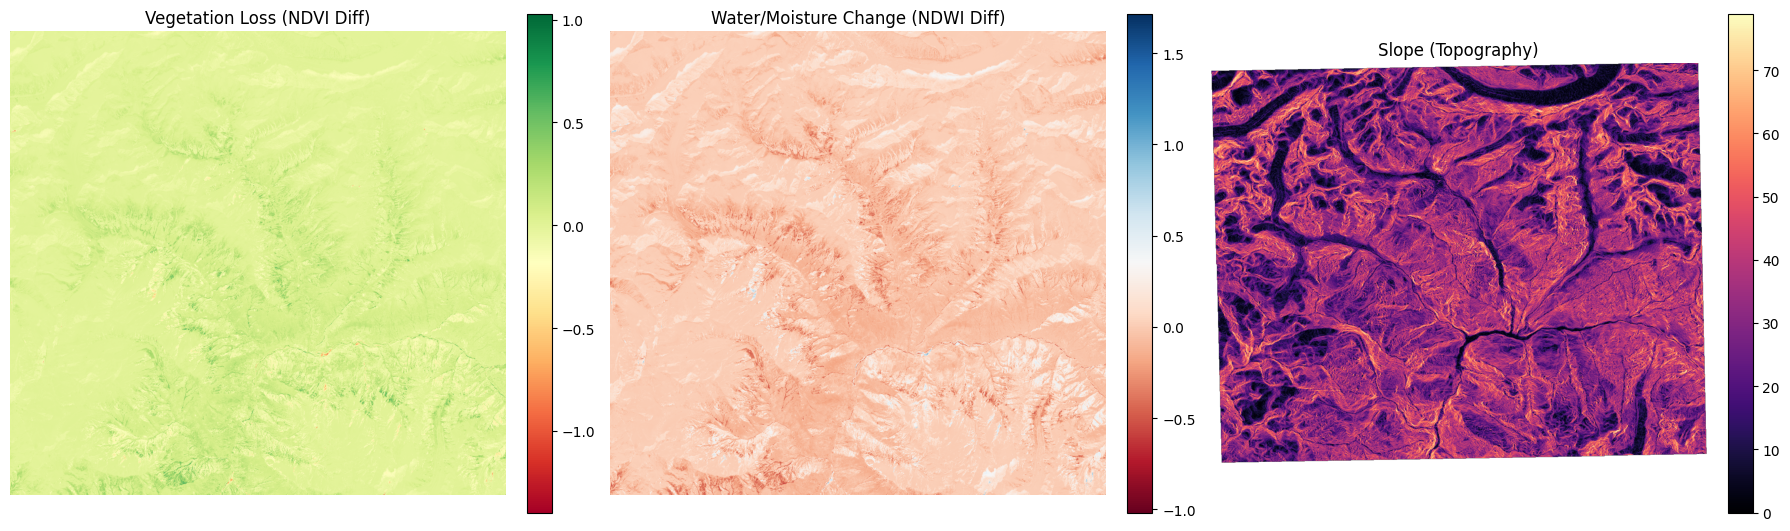

In [5]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import os

base_path = '/content/drive/MyDrive/Dharali'

# Files to analyze
files = {
    'Vegetation Loss (NDVI Diff)': '2_NDVI_Diff.tif',
    'Water/Moisture Change (NDWI Diff)': '3_NDWI_Diff.tif',
    'Slope (Topography)': '5_Terrain_Slope.tif'
}

plt.figure(figsize=(18, 6))

for idx, (title, filename) in enumerate(files.items()):
    path = os.path.join(base_path, filename)

    if os.path.exists(path):
        with rasterio.open(path) as src:
            img = src.read(1)

            # Handling NoData values (usually very low or high numbers)
            img = np.where(img == src.nodata, np.nan, img)

            plt.subplot(1, 3, idx + 1)

            # Use specific colormaps for different data types
            cmap = 'RdYlGn' if 'NDVI' in title else 'RdBu' if 'NDWI' in title else 'magma'

            plt.imshow(img, cmap=cmap)
            plt.colorbar(fraction=0.046, pad=0.04)
            plt.title(title)
            plt.axis('off')

plt.tight_layout()
plt.show()

Loading Reference Label...
Reference Grid Size: (2961, 3164) (9368604 pixels)
Aligning and Extracting Feature Pixels...
Processing NDVI_Change...
Processing NDWI_Change...
Processing Slope...
Processing DEM...
Total Pixels: 9368604
Valid Training Pixels: 9344920

Training Random Forest...

Model Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   2783060
         1.0       1.00      1.00      1.00     20416

    accuracy                           1.00   2803476
   macro avg       1.00      1.00      1.00   2803476
weighted avg       1.00      1.00      1.00   2803476



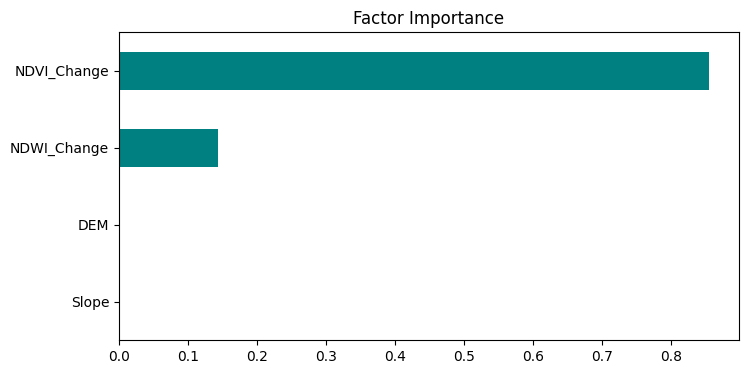

In [7]:
import rasterio
import numpy as np
import pandas as pd
from rasterio.warp import reproject, Resampling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import os

# --- 1. Configuration ---
base_path = '/content/drive/MyDrive/Dharali'

feature_files = {
    'NDVI_Change': '2_NDVI_Diff.tif',
    'NDWI_Change': '3_NDWI_Diff.tif',
    'Slope': '5_Terrain_Slope.tif',
    'DEM': 'DEM_for_HECRAS.tif'
}

label_filename = '2_Mask_Landslide.tif'

# --- 2. Alignment Function ---
def read_and_align(target_path, reference_meta, reference_shape):
    """
    Reads a target raster and strictly resamples it to match the reference raster's grid.
    """
    if not os.path.exists(target_path):
        print(f"Error: {target_path} not found.")
        return None

    with rasterio.open(target_path) as src:
        # Create an empty array with the shape of the reference image
        destination = np.zeros(reference_shape, dtype=src.read(1).dtype)

        # Reproject (Resample) the target image into the destination array
        reproject(
            source=rasterio.band(src, 1),
            destination=destination,
            src_transform=src.transform,
            src_crs=src.crs,
            dst_transform=reference_meta['transform'],
            dst_crs=reference_meta['crs'],
            resampling=Resampling.nearest  # Use nearest for strict alignment
        )

        # Replace NoData with NaN
        destination = np.where(destination == src.nodata, np.nan, destination)
        return destination.flatten()

# --- 3. Load Reference (Label) First ---
print("Loading Reference Label...")
label_path = os.path.join(base_path, label_filename)

with rasterio.open(label_path) as ref_src:
    ref_meta = ref_src.meta.copy()
    ref_shape = ref_src.shape
    # Read Label Data
    label_data = ref_src.read(1).flatten()
    # Handle Label NoData
    label_data = np.where(label_data == ref_src.nodata, np.nan, label_data)

print(f"Reference Grid Size: {ref_shape} ({len(label_data)} pixels)")

# --- 4. Load & Align Features ---
print("Aligning and Extracting Feature Pixels...")
data_dict = {}

for name, filename in feature_files.items():
    path = os.path.join(base_path, filename)
    print(f"Processing {name}...")
    aligned_pixels = read_and_align(path, ref_meta, ref_shape)

    if aligned_pixels is not None:
        data_dict[name] = aligned_pixels

# Add label to dictionary
data_dict['Label'] = label_data

# --- 5. Create DataFrame ---
# Now all arrays are guaranteed to be the same length
df = pd.DataFrame(data_dict)

# --- 6. Clean Data (Remove invalid pixels) ---
print(f"Total Pixels: {len(df)}")
# Drop rows where Label is NaN (outside valid area) or Features are NaN
df_clean = df.dropna()
print(f"Valid Training Pixels: {len(df_clean)}")

if len(df_clean) == 0:
    raise ValueError("No valid pixels found! Check if your images overlap geographically.")

# --- 7. Train Model ---
print("\nTraining Random Forest...")
X = df_clean.drop(columns=['Label'])
y = df_clean['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# --- 8. Results ---
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# --- 9. Feature Importance ---
plt.figure(figsize=(8, 4))
pd.Series(rf_model.feature_importances_, index=X.columns).sort_values().plot(kind='barh', color='teal')
plt.title("Factor Importance")
plt.show()

Generating full susceptibility map...


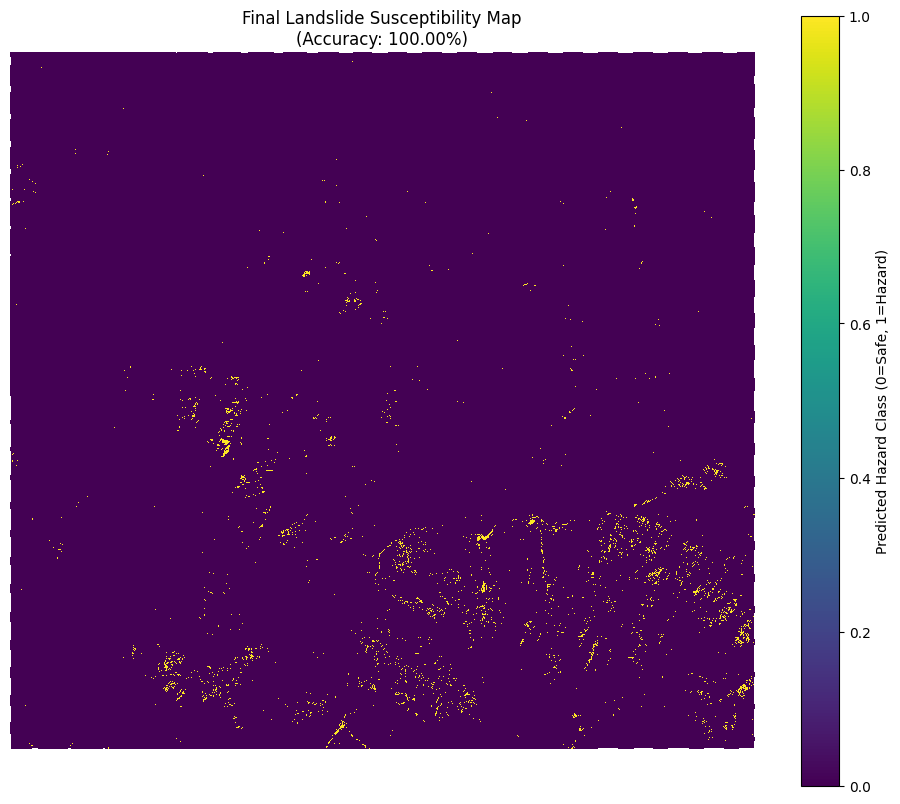

Map saved to: /content/drive/MyDrive/Dharali/Predicted_Susceptibility_Map.tif


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Predict for the Whole Area ---
# We use the model to predict on ALL valid pixels (Training + Testing combined)
print("Generating full susceptibility map...")
# X was defined in the previous step as df_clean.drop(columns=['Label'])
full_predictions = rf_model.predict(X)

# --- 2. Reconstruct the Image ---
# Create an empty array filled with NaNs (for the background/nodata areas)
# ref_shape was defined in the previous step (rows, cols)
susceptibility_map_flat = np.full(ref_shape[0] * ref_shape[1], np.nan)

# Place the predictions back into their original pixel locations
# df_clean.index holds the original pixel positions
susceptibility_map_flat[df_clean.index] = full_predictions

# Reshape from 1D line back to 2D image
susceptibility_map = susceptibility_map_flat.reshape(ref_shape)

# --- 3. Visualize the Map ---
plt.figure(figsize=(12, 10))

# Plot the susceptibility
# 1 (Yellow/Red) = Landslide Susceptible, 0 (Purple/Blue) = Safe
plt.imshow(susceptibility_map, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Predicted Hazard Class (0=Safe, 1=Hazard)')
plt.title(f"Final Landslide Susceptibility Map\n(Accuracy: {acc:.2%})")
plt.axis('off')
plt.show()

# --- 4. Save the Map (Optional) ---
# This saves the result as a GeoTIFF you can open in QGIS/ArcGIS
output_file = os.path.join(base_path, 'Predicted_Susceptibility_Map.tif')

with rasterio.open(label_path) as src:
    profile = src.profile
    profile.update(dtype=rasterio.float32, count=1, nodata=np.nan)

    with rasterio.open(output_file, 'w', **profile) as dst:
        dst.write(susceptibility_map.astype(rasterio.float32), 1)

print(f"Map saved to: {output_file}")

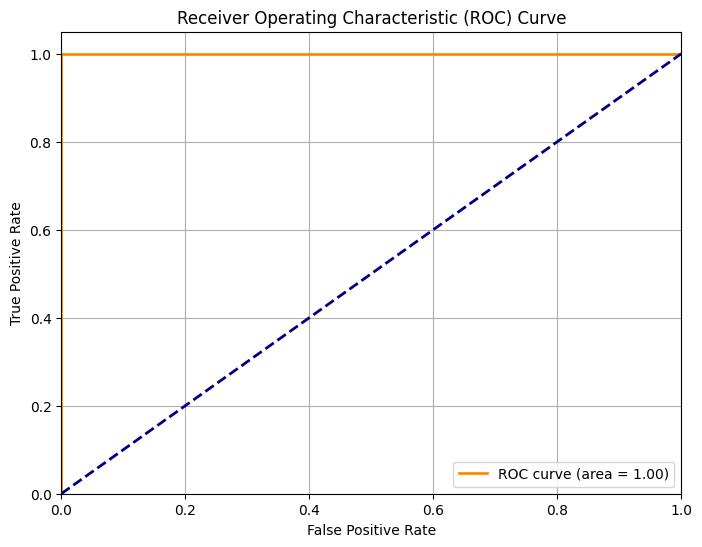

AUC Score: 1.0000


In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Get Probability Predictions (instead of just 0 or 1)
# We need the probability that a pixel is a landslide
y_probs = rf_model.predict_proba(X_test)[:, 1]

# 2. Calculate ROC Metrics
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# 3. Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"AUC Score: {roc_auc:.4f}")

In [11]:
# 1. Get Pixel Resolution (Size of one pixel in meters)
# We read this from the reference image metadata
with rasterio.open('/content/drive/MyDrive/Dharali/2_Mask_Landslide.tif') as src:
    res_x, res_y = src.res  # Resolution (e.g., 10m x 10m)
    pixel_area_sq_m = abs(res_x * res_y) # Area of one pixel in square meters

# 2. Count "Hazard" Pixels
# susceptibility_map was created in the previous step
hazard_pixels = np.nansum(susceptibility_map == 1)

# 3. Convert to Square Kilometers
total_area_sq_km = (hazard_pixels * pixel_area_sq_m) / 1_000_000

print(f"--- Damage Assessment Results ---")
print(f"Pixel Resolution: {res_x}m x {abs(res_y)}m")
print(f"Total Hazard Pixels: {int(hazard_pixels)}")
print(f"Total Affected Area: {total_area_sq_km:.4f} km²")

--- Damage Assessment Results ---
Pixel Resolution: 10.0m x 10.0m
Total Hazard Pixels: 67899
Total Affected Area: 6.7899 km²


In [12]:
import rasterio
from rasterio.features import shapes
import geopandas as gpd
from shapely.geometry import shape

# 1. Load the Prediction Map
# We assume 'susceptibility_map' and 'profile' (from the previous step) are available.
# If you restarted the session, reload the TIFF file you just saved:
map_path = '/content/drive/MyDrive/Dharali/Final_Landslide_Impact_Map.tif'

with rasterio.open(map_path) as src:
    image = src.read(1)
    mask = image == 1  # We only want the "Hazard" polygons (Class 1)
    transform = src.transform
    crs = src.crs

    # 2. Vectorize (Convert Raster pixels to Polygons)
    print("Vectorizing landslide areas...")
    results = (
        {'properties': {'raster_val': v}, 'geometry': s}
        for i, (s, v) in enumerate(
            shapes(image, mask=mask, transform=transform))
    )

# 3. Create GeoDataFrame
geoms = list(results)
if len(geoms) > 0:
    gdf = gpd.GeoDataFrame.from_features(geoms, crs=crs)

    # 4. Save as Shapefile
    output_shp = '/content/drive/MyDrive/Dharali/Landslide_Extent.shp'
    gdf.to_file(output_shp)
    print(f"Shapefile saved to: {output_shp}")
    print(f"Number of landslide polygons created: {len(gdf)}")
else:
    print("No landslide areas found to vectorize.")

Vectorizing landslide areas...
Shapefile saved to: /content/drive/MyDrive/Dharali/Landslide_Extent.shp
Number of landslide polygons created: 17132


In [ ]:
import rasterio
from rasterio.warp import reproject, Resampling
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import os

# --- 1. Configuration ---
base_path = '/content/drive/MyDrive/Dharali'

# Modified Feature List (No NDVI)
feature_files = {
    'NDWI_Change': '3_NDWI_Diff.tif',    # Water/Moisture signal
    'NDSI_Change': '4_NDSI_Diff.tif',    # Snow/Debris signal
    'Slope': '5_Terrain_Slope.tif'       # Topographic Driver
}

label_filename = '2_Mask_Landslide.tif'

# --- 2. Alignment Function (Same as before) ---
def read_and_align(target_path, reference_meta, reference_shape):
    """Resamples target raster to match reference geometry exactly."""
    if not os.path.exists(target_path):
        print(f"Error: {target_path} not found.")
        return None
    with rasterio.open(target_path) as src:
        destination = np.zeros(reference_shape, dtype=src.read(1).dtype)
        reproject(
            source=rasterio.band(src, 1),
            destination=destination,
            src_transform=src.transform,
            src_crs=src.crs,
            dst_transform=reference_meta['transform'],
            dst_crs=reference_meta['crs'],
            resampling=Resampling.nearest
        )
        return np.where(destination == src.nodata, np.nan, destination).flatten()

# --- 3. Load Data ---
print("Loading Data (excluding NDVI)...")

# Load Reference Label first
label_path = os.path.join(base_path, label_filename)
with rasterio.open(label_path) as ref_src:
    ref_meta = ref_src.meta.copy()
    ref_shape = ref_src.shape
    label_data = ref_src.read(1).flatten()
    label_data = np.where(label_data == ref_src.nodata, np.nan, label_data)

data_dict = {}

# Load & Align Features
for name, filename in feature_files.items():
    print(f"Processing {name}...")
    path = os.path.join(base_path, filename)
    aligned_pixels = read_and_align(path, ref_meta, ref_shape)
    if aligned_pixels is not None:
        data_dict[name] = aligned_pixels

data_dict['Label'] = label_data
df = pd.DataFrame(data_dict)

# --- 4. Clean Data ---
print(f"Total Pixels: {len(df)}")
df_clean = df.dropna()
print(f"Valid Pixels for Training: {len(df_clean)}")

if len(df_clean) == 0:
    raise ValueError("No overlapping valid pixels found.")

# --- 5. Train Random Forest ---
print("\nTraining Random Forest on NDWI, NDSI, and Slope...")
X = df_clean.drop(columns=['Label'])
y = df_clean['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model_no_ndvi = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model_no_ndvi.fit(X_train, y_train)

# --- 6. Results & Feature Importance ---
y_pred = rf_model_no_ndvi.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"\nModel Accuracy (without NDVI): {acc:.4f}")
print(classification_report(y_test, y_pred))

# Plot Importance
plt.figure(figsize=(8, 4))
pd.Series(rf_model_no_ndvi.feature_importances_, index=X.columns).sort_values().plot(kind='barh', color='darkorange')
plt.title("Factor Importance (Vegetation Removed)")
plt.xlabel("Importance Score")
plt.show()

Loading Data (excluding NDVI)...
Processing NDWI_Change...
Processing NDSI_Change...
Processing Slope...
Total Pixels: 9368604
Valid Pixels for Training: 9344924

Training Random Forest on NDWI, NDSI, and Slope...
